In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
true_new_path = r"Fake.csv"
fake_new_path = r"True.csv"
real_news = pd.read_csv(true_new_path)
fake_news = pd.read_csv(fake_new_path)
real_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
real_news['label'] = 0
fake_news['label'] = 1

In [5]:
real_news.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
fake_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
fake_news['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [8]:
real_news.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [9]:
fake_news.shape, real_news.shape

((21417, 5), (23481, 5))

In [10]:
fake_news.describe()

,label
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [11]:
real_news.describe().T

,count,mean,std,min,25%,50%,75%,max
label,23481.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
real_news.describe()
# in this funtion we have zero describtion because the value of real_news is 0

,label
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [13]:

print(f'type = {type(fake_news)}')

type = <class 'pandas.core.frame.DataFrame'>


In [14]:
print(f'type = {type(real_news)}')

type = <class 'pandas.core.frame.DataFrame'>


In [15]:
# Check fake_news index
fake_news.index


RangeIndex(start=0, stop=21417, step=1)

In [16]:
real_news.index

RangeIndex(start=0, stop=23481, step=1)

In [17]:
# ______________________________________________
fake_news_manual_testing = fake_news.tail(15)
fake_news = fake_news.iloc[:-10]
real_news_manual_testing = real_news.tail(15)
real_news = real_news.iloc[:-10]
fake_news_manual_testing

,title,text,subject,date,label
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [18]:
real_news_manual_testing

,title,text,subject,date,label
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [19]:
# joining the two data such as fake and real news 
marge = pd.concat([fake_news,real_news]).reset_index(drop = True)
marge

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44873,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
44874,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
44875,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
44876,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0


In [20]:
_columns = marge.columns
_columns


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [21]:
df= marge.drop(['title'], axis = 1,errors = 'ignore')
df.head()

,text,subject,date,label
0,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [27]:
fake_news.describe()

,label
count,21407.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [28]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21407 entries, 0 to 21406
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21407 non-null  object
 1   text     21407 non-null  object
 2   subject  21407 non-null  object
 3   date     21407 non-null  object
 4   label    21407 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.3+ KB


In [29]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23471 entries, 0 to 23470
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23471 non-null  object
 1   text     23471 non-null  object
 2   subject  23471 non-null  object
 3   date     23471 non-null  object
 4   label    23471 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.0+ KB


In [30]:
df.isna().sum()

text       0
subject    0
date       0
label      0
dtype: int64

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy 
import re
nltk.download('wordnet')
nltk.download('stopwords',quiet = True)
nlp = spacy.load("en_core_web_sm")

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [55]:
df.shape 

(44878, 4)

In [56]:
lemma = WordNetLemmatizer()
lemma

<WordNetLemmatizer>

In [57]:
list1 = nlp.Defaults.stop_words
len(list1)

326

In [58]:
list2 = stopwords.words('english')
len(list2)

198

In [59]:
Stopword = set((set(list1)|set(list2)))
len(Stopword)

401

In [60]:
# Now we claculate the length of our Stopword
len(Stopword)

401

In [61]:
# Now we made a function by the name of clean_text
def clean_text(text):
    # Lower_casting
    text = text.lower()

    #Removing aphstrphy
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"she'm","she is",text)
    text = re.sub(r"you're","you are",text)
    text = re.sub(r"we're","we are",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"that's","that is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r'\[.*?\]' , '' ,text)
    text = re.sub(r'\\W', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '' ,text)
    text = re.sub(r'<.*?>+','',text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation),' ',text)
    text = re.sub(r'\n','',text)
    text = re.sub(r'\w*\d\w*','',text)
    return text
    
    

In [62]:
df['text'] = df['text'].apply(clean_text)

In [63]:
df['text'][0]

'washington  reuters    the head of a conservative republican faction in the u s  congress  who voted this month for a huge expansion of the national debt to pay for tax cuts  called himself a “fiscal conservative” on sunday and urged budget restraint in   in keeping with a sharp pivot under way among republicans  u s  representative mark meadows  speaking on cbs’ “face the nation ” drew a hard line on federal spending  which lawmakers are bracing to do battle over in january  when they return from the holidays on wednesday  lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues  such as immigration policy  even as the november congressional election campaigns approach in which republicans will seek to keep control of congress  president donald trump and his republicans want a big budget increase in military spending  while democrats also want proportional increases for non defense “discretionary” spending on programs that support education 

In [64]:
df['label'][0]

np.int64(1)

In [65]:
df['text'][44877]

'rtone of the most visible members of the armed militia that took over a wildlife refuge in oregon says his four foster sons were taken away due to his involvement in the standoff  and he blames the federal government who  must have gotten to the governor  robert  lavoy  finicum and his wife jeanette have fostered more than  boys over the last decade at their ranch near chino valley  arizona  the couple is licensed and has a care contract with the catholic charities community services  many of the children came from mental hospitals  drug rehabs and group homes for emotionally distressed youth  he told oregon public broadcasting  opb   image  robert  lavoy  finicum  my ranch has been a great tool for these boys   finicum said   it has done a lot of good  he traveled to oregon to take part in the takeover of the malheur national wildlife refuge at the beginning of january  leaving jeanette to care for the four boys  but now the finicums have no more fosters to care for a social worker b

In [66]:
df['label'][44877]

np.int64(0)

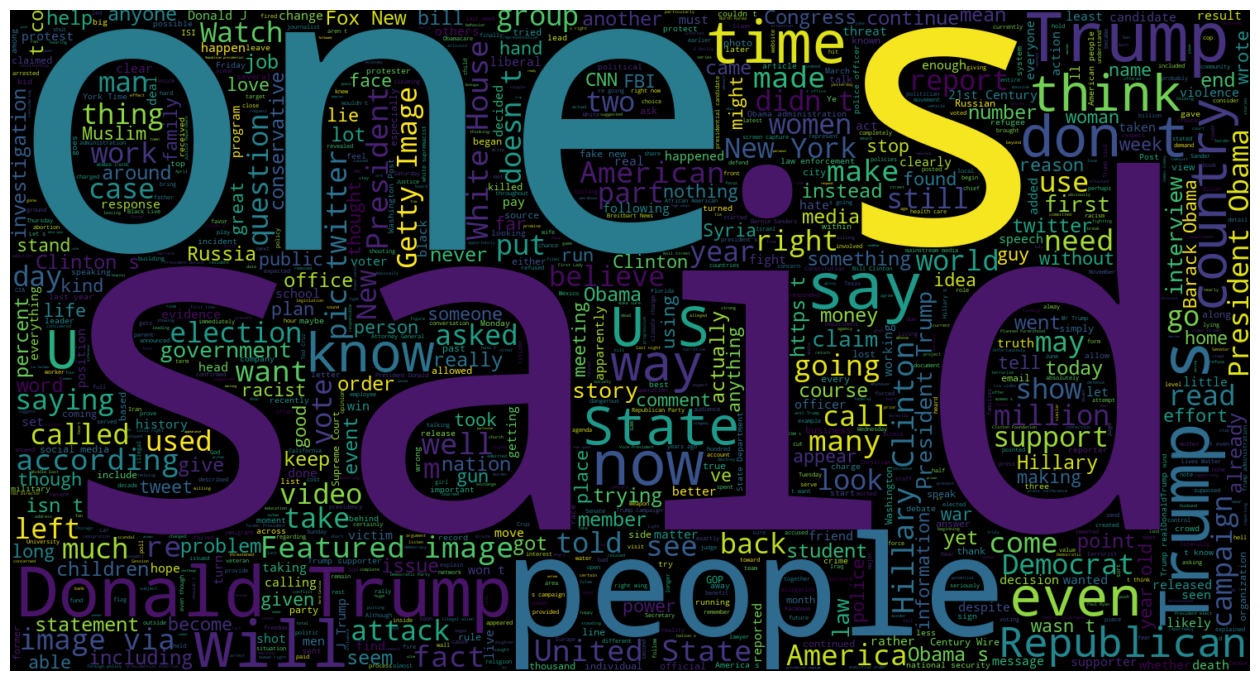

In [68]:
from wordcloud import WordCloud
plt.figure(figsize = (16,15))
wc = WordCloud(max_words = 1000, width = 1500, height = 800).generate(" ".join(real_news[real_news.label== 0].text))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')

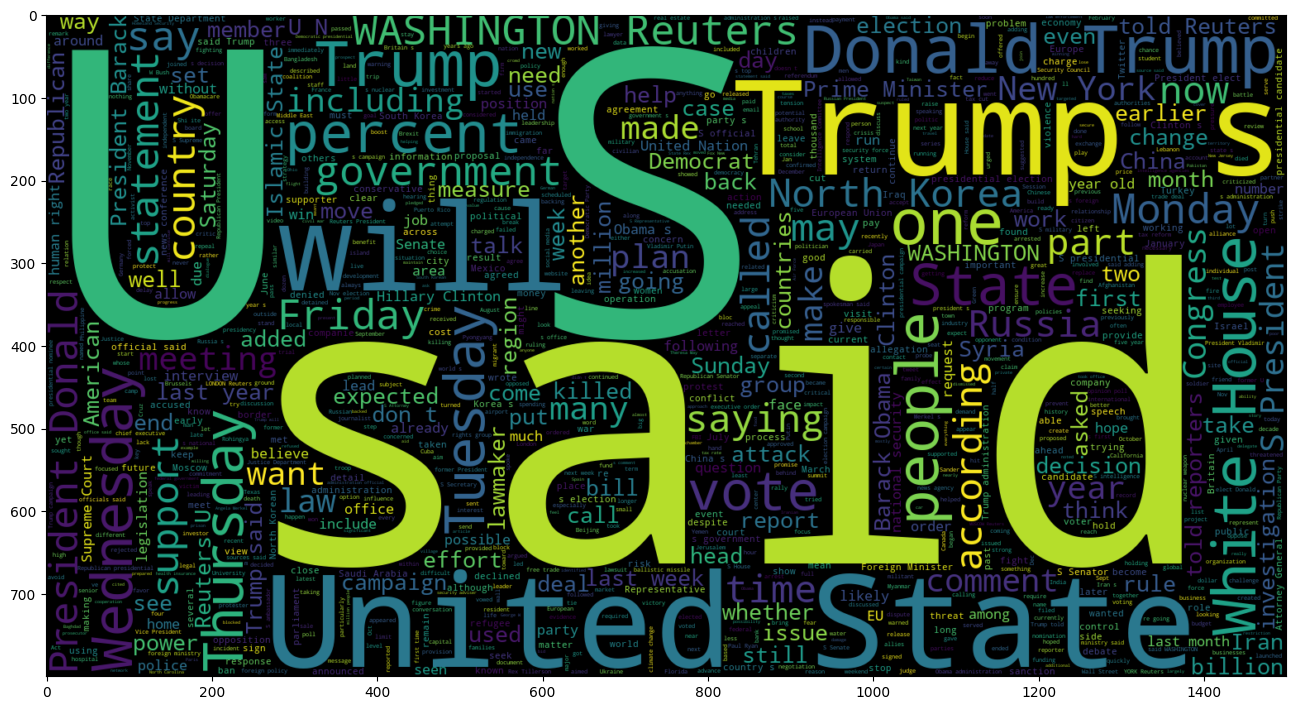

In [69]:
plt.figure(figsize = (16,15))
wc = WordCloud(max_words = 1000, width = 1500, height = 800).generate(" ".join(fake_news[fake_news.label== 1].text))
plt.axis("on")
plt.imshow(wc, interpolation = 'bilinear')

In [76]:
# Modling Building
x= df['text']
y = df['label']

Text(0.5, 0, 'type of label')

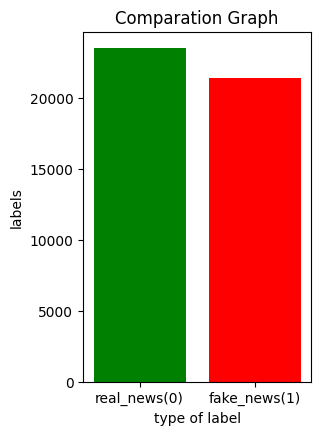

In [80]:
plt.figure(figsize = (10,10))
plt.subplot(2,3,2)
class_dist = y.value_counts()
label_plot = ['real_news(0)','fake_news(1)']
colors = ['green','red']
plt.bar(label_plot,class_dist,color= colors)
plt.title("Comparation Graph")
plt.ylabel("labels")
plt.xlabel("type of label")

In [71]:
df['text_length'] = df ['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text'].astype(str).apply(lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) >0 else 0)
df

,text,subject,date,label,text_length,word_count,avg_word_length
0,washington reuters the head of a conservat...,politicsNews,"December 31, 2017",1,4626,746,5.034853
1,washington reuters transgender people will...,politicsNews,"December 29, 2017",1,4061,626,5.367412
2,washington reuters the special counsel inv...,politicsNews,"December 31, 2017",1,2781,461,4.921909
3,washington reuters trump campaign adviser ...,politicsNews,"December 30, 2017",1,2451,379,5.340369
4,seattle washington reuters president donal...,politicsNews,"December 29, 2017",1,5142,842,4.920428
...,...,...,...,...,...,...,...
44873,century wire says for those who still refuse ...,Middle-east,"January 22, 2016",0,2247,381,4.758530
44874,century wire says so far after nearly days ...,Middle-east,"January 21, 2016",0,1684,289,4.674740
44875,century wire says if you ve been following th...,Middle-east,"January 21, 2016",0,650,104,5.086538
44876,tune in to the alternate current radio network...,Middle-east,"January 20, 2016",0,1130,184,4.929348


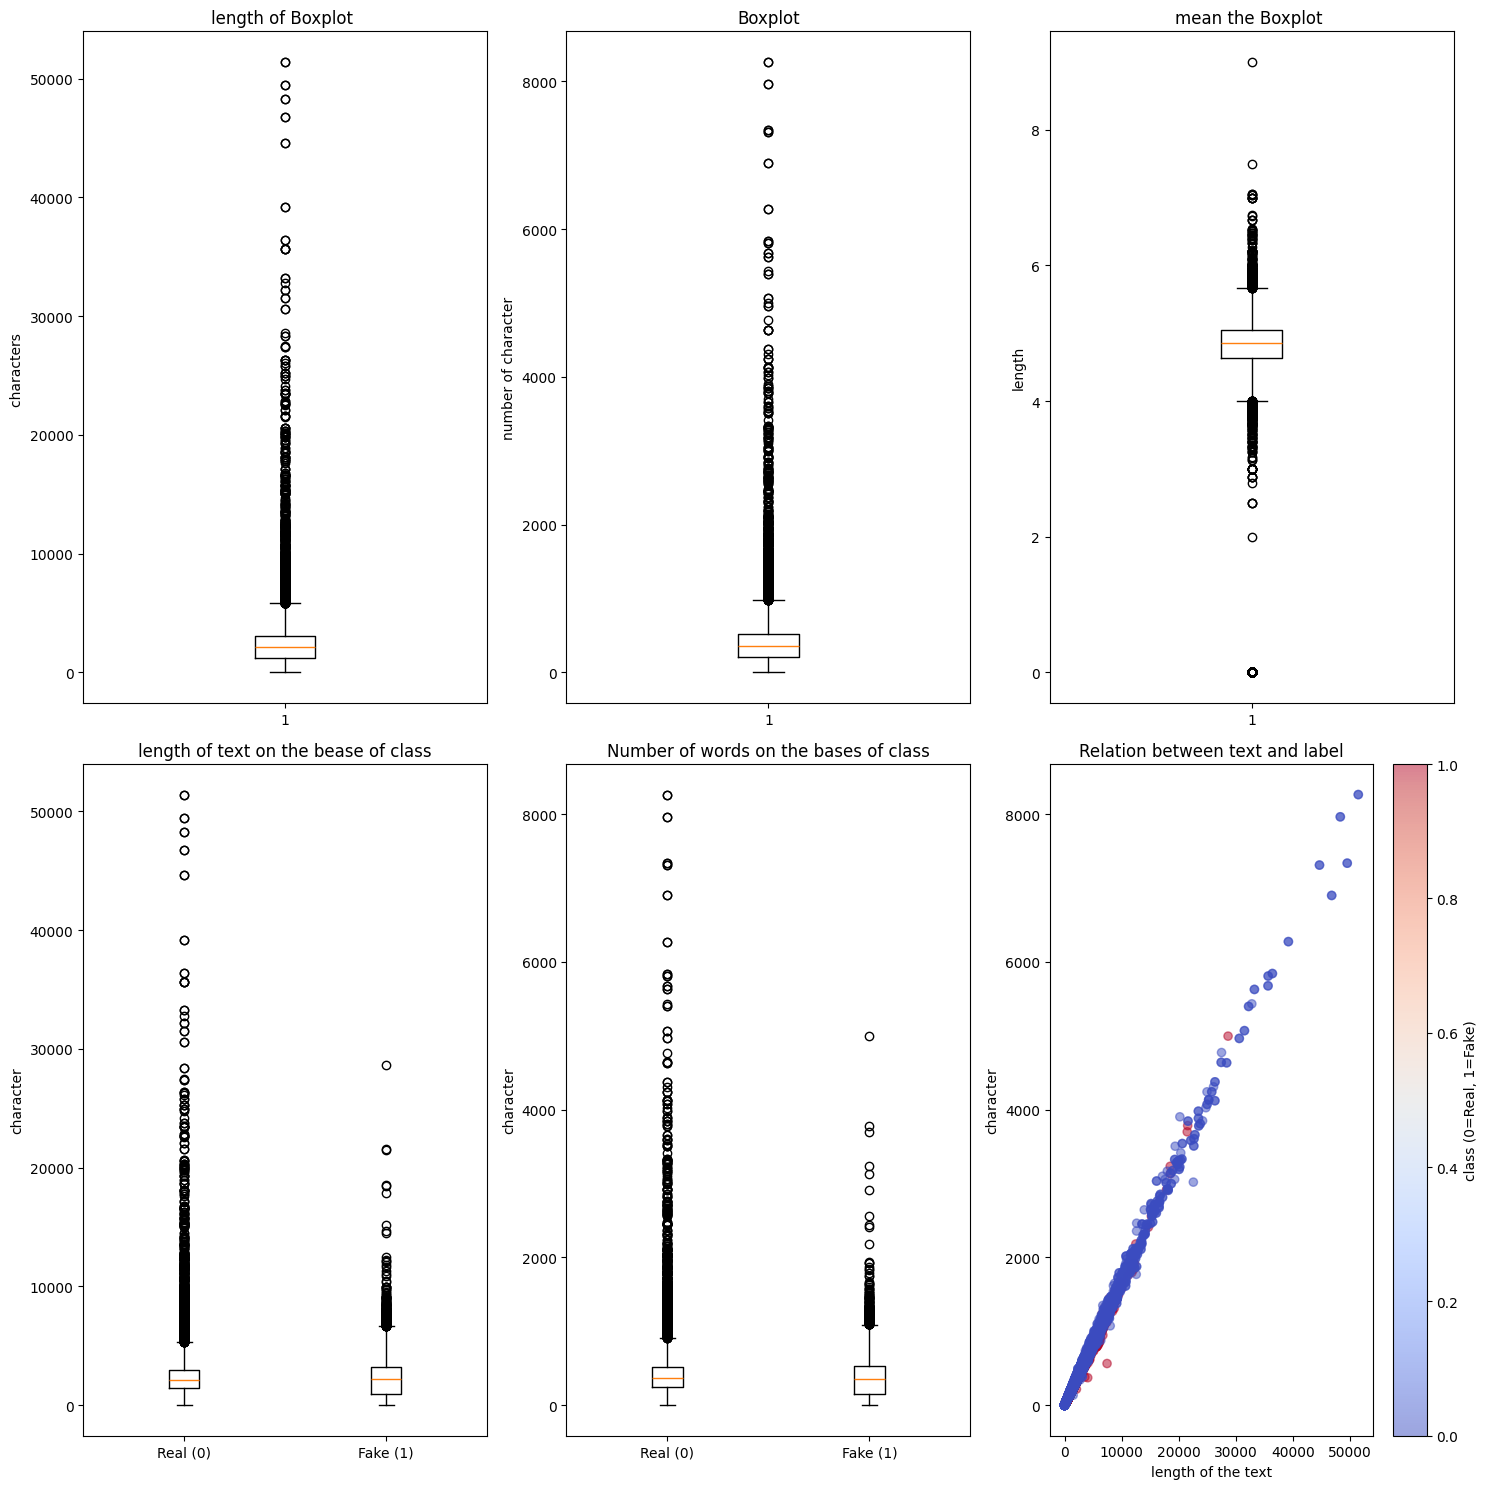

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Boxplot 1: طول متن
axes[0, 0].boxplot(df['text_length'])
axes[0, 0].set_title('length of Boxplot ')
axes[0, 0].set_ylabel('characters ')

# Boxplot 2: تعداد کلمات
axes[0, 1].boxplot(df['word_count'])
axes[0, 1].set_title('Boxplot')
axes[0, 1].set_ylabel('number of character')

# Boxplot 3: میانگین طول کلمات
axes[0, 2].boxplot(df['avg_word_length'])
axes[0, 2].set_title('mean the Boxplot ')
axes[0, 2].set_ylabel('length')

# Boxplot 4: طول متن بر اساس کلاس
bp1 = axes[1, 0].boxplot([df[df['label']==0]['text_length'], 
                         df[df['label']==1]['text_length']])
axes[1, 0].set_title('length of text on the bease of class')
axes[1, 0].set_xticklabels(['Real (0)', 'Fake (1)'])
axes[1, 0].set_ylabel('character')

# Boxplot 5: تعداد کلمات بر اساس کلاس
bp2 = axes[1, 1].boxplot([df[df['label']==0]['word_count'], 
                         df[df['label']==1]['word_count']])
axes[1, 1].set_title('Number of words on the bases of class')
axes[1, 1].set_xticklabels(['Real (0)', 'Fake (1)'])
axes[1, 1].set_ylabel('character')

# Boxplot 6: Scatter plot برای رابطه طول و تعداد کلمات
scatter = axes[1, 2].scatter(df['text_length'], df['word_count'], 
                            c=df['label'], alpha=0.5, cmap='coolwarm')
axes[1, 2].set_title('Relation between text and label')
axes[1, 2].set_xlabel('length of the text')
axes[1, 2].set_ylabel('character')
plt.colorbar(scatter, ax=axes[1, 2], label='class (0=Real, 1=Fake)')

plt.tight_layout()
# plt.savefig('boxplots_analysis.png', dpi=50, bbox_inches='tight')
plt.show()


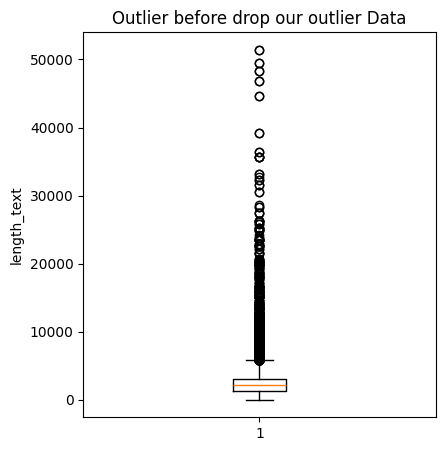

In [83]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(df['text_length'])
plt.title("Outlier before drop our outlier Data")
plt.ylabel('length_text')
plt.show()

In [85]:
q1 = df['text_length'].quantile(0.25)
q3 = df['text_length'].quantile(0.75)
IQR = q3-q1
'This is my IQR: ',IQR

('This is my IQR: ', np.float64(1852.0))

In [87]:
lower_bound = q1 - IQR
upper_bound = q3 - IQR
lower_bound,'  ---- ',upper_bound

(np.float64(-633.0), '  ---- ', np.float64(1219.0))

In [88]:
print(f"first (Q1): {q1}")
print(f"secound (Q3): {q3}")
print(f"IQR: {IQR}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

first (Q1): 1219.0
secound (Q3): 3071.0
IQR: 1852.0
lower_bound: -633.0
upper_bound: 1219.0


In [89]:
df_clean = df[(df['text_length'] >= lower_bound) & (df['text_length']<=upper_bound)]
df_clean

,text,subject,date,label,text_length,word_count,avg_word_length
7,the following statements were posted to the ve...,politicsNews,"December 29, 2017",1,808,126,5.000000
8,the following statements were posted to the ve...,politicsNews,"December 29, 2017",1,591,96,4.770833
9,washington reuters alabama secretary of st...,politicsNews,"December 28, 2017",1,405,67,4.880597
12,the following statements were posted to the ve...,politicsNews,"December 28, 2017",1,575,95,4.684211
13,the following statements were posted to the ve...,politicsNews,"December 28, 2017",1,1082,166,4.933735
...,...,...,...,...,...,...,...
44862,tune in to the alternate current radio network...,Middle-east,"February 3, 2016",0,897,143,5.048951
44864,century wire says if you ve been following th...,Middle-east,"February 3, 2016",0,1211,205,4.785366
44871,episode of sunday wire show finally resumes ...,Middle-east,"January 24, 2016",0,1204,195,4.912821
44875,century wire says if you ve been following th...,Middle-east,"January 21, 2016",0,650,104,5.086538


In [90]:
print(f"\nNo of main data: {len(df)}")
print(f"outlier: {len(df) - len(df_clean)}")
print(f"Cleaning_data: {len(df_clean)}")



No of main data: 44878
outlier: 33655
Cleaning_data: 11223


In [91]:
outliers = df[(df['text_length']>lower_bound) | (df['text_length']<upper_bound)]
outliers

,text,subject,date,label,text_length,word_count,avg_word_length
0,washington reuters the head of a conservat...,politicsNews,"December 31, 2017",1,4626,746,5.034853
1,washington reuters transgender people will...,politicsNews,"December 29, 2017",1,4061,626,5.367412
2,washington reuters the special counsel inv...,politicsNews,"December 31, 2017",1,2781,461,4.921909
3,washington reuters trump campaign adviser ...,politicsNews,"December 30, 2017",1,2451,379,5.340369
4,seattle washington reuters president donal...,politicsNews,"December 29, 2017",1,5142,842,4.920428
...,...,...,...,...,...,...,...
44873,century wire says for those who still refuse ...,Middle-east,"January 22, 2016",0,2247,381,4.758530
44874,century wire says so far after nearly days ...,Middle-east,"January 21, 2016",0,1684,289,4.674740
44875,century wire says if you ve been following th...,Middle-east,"January 21, 2016",0,650,104,5.086538
44876,tune in to the alternate current radio network...,Middle-east,"January 20, 2016",0,1130,184,4.929348


In [92]:
print(f"=============Charactrastics of removed data ===========:")
print(f"minuim of outlier: {outliers['text_length'].min()} ")
print(f"maximum of outlier: {outliers['text_length'].max()}")
print(f"mean of outlier: {outliers['text_length'].mean():.0f}")

=============Charactrastics of removed data ===========:
minuim of outlier: 0 
maximum of outlier: 51422
mean of outlier: 2443


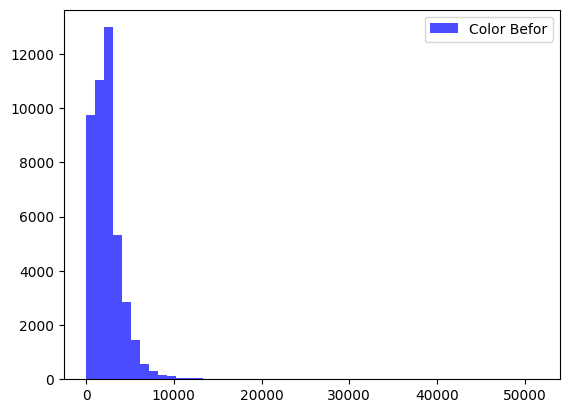

In [135]:
# fig, axes = plt.subplots(2, 1, figsize=(7, 5))
# Histogram before 
plt.hist(df['text_length'],bins = 50,alpha=0.7, color='blue', label='Color Befor')

plt.legend()
# plt.tight_layout()
plt.show()

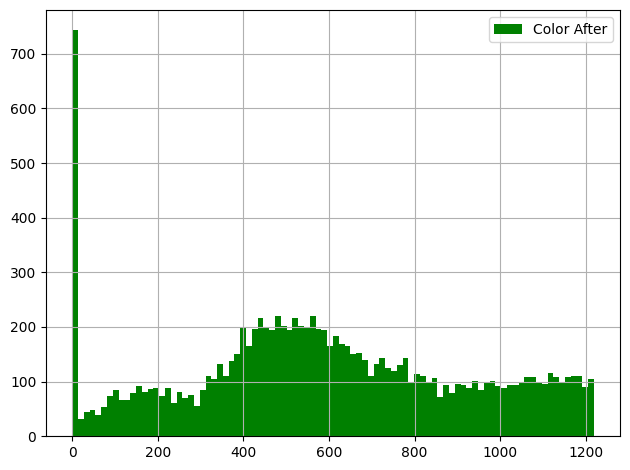

In [114]:
plt.hist(df_clean['text_length'],bins = 90,color='green', label='Color After')
# plt.set_title('After')
# plt.set_xlabel('length')
# plt.set_ylabel('Numbers')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

In [115]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [116]:
x_train

27091    a group of white nationalists and skinheads wh...
28922    donald trump and his supporters are absolutely...
35536    watch this video and you ll see why this man i...
16621    wellington  reuters    new zealand s new gover...
33       vatican city  reuters    callista gingrich  wi...
                               ...                        
11284    abuja  reuters    the united states has formal...
44732    tune in to the alternate current radio network...
38158    the main stream media chooses to ignore the fa...
860      washington  reuters    the republican tax plan...
15795    sydney  reuters    the u n  high commissioner ...
Name: text, Length: 35902, dtype: object

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000,ngram_range=(1,2))
x_train_tfid = vectorizer.fit_transform(x_train)
x_test_tfid = vectorizer.transform(x_test)
x_train_tfid,x_test_tfid

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 8229298 stored elements and shape (35902, 5000)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 2065923 stored elements and shape (8976, 5000)>)

In [118]:
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train_tfid,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [119]:
pred_lr_test = LR.predict(x_test_tfid)
pred_lr_train = LR.predict(x_train_tfid)

In [120]:
acc_lr_test = accuracy_score(y_test,pred_lr_test)
acc_lr_test

0.9908645276292335

In [121]:
acc_lr_train = accuracy_score(y_train,pred_lr_train)
acc_lr_train

0.992228845189683

In [122]:
print(classification_report(y_test,pred_lr_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4654
           1       0.99      0.99      0.99      4322

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [123]:
print(classification_report(y_train,pred_lr_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18817
           1       0.99      0.99      0.99     17085

    accuracy                           0.99     35902
   macro avg       0.99      0.99      0.99     35902
weighted avg       0.99      0.99      0.99     35902



In [124]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train_tfid,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [125]:
pred_dt_test = dt.predict(x_test_tfid)
pred_dt_train = dt.predict(x_train_tfid)

In [126]:
acc_test_dt = accuracy_score(y_test,pred_dt_test)
acc_test_dt

0.9964349376114082

In [127]:
acc_train_dt = accuracy_score(y_train,pred_dt_train)
acc_train_dt

0.9999721463985294

In [128]:
print(confusion_matrix(y_test,pred_dt_test))

[[4640   14]
 [  18 4304]]


In [129]:
print(confusion_matrix(y_train,pred_dt_train))

[[18817     0]
 [    1 17084]]


In [130]:
gbc = GradientBoostingClassifier(random_state = 42,n_estimators = 1000,learning_rate = 0,1)
gbc.fit(x_train_tfid,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [131]:
pred_gbc_test = gbc.predict(x_test_tfid)
pred_gbc_train = gbc.predict(x_train_tfid)

In [132]:
acc_train_gbc= accuracy_score(y_train,pred_gbc_train)
acc_train_gbc

0.9981338087014651

In [133]:
acc_test_gbc = accuracy_score(y_test,pred_gbc_test)
acc_test_gbc

0.9949866310160428

In [134]:
print(confusion_matrix(y_test,pred_gbc_test))

[[4621   33]
 [  12 4310]]


In [136]:
rf= RandomForestClassifier(random_state = 42,max_depth = 3)
rf.fit(x_train_tfid,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [137]:
pred_rf_test = rf.predict(x_test_tfid)
pred_rf_train = rf.predict(x_train_tfid)

In [138]:
acc_train_rf = accuracy_score(y_train,pred_rf_train)
acc_test_rf = accuracy_score(y_test,pred_rf_test)
acc_train_rf ," ", acc_test_rf

(0.9801403821514122, ' ', 0.9800579322638147)

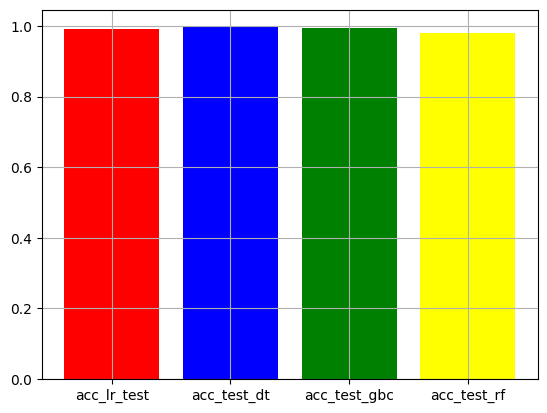

In [163]:
acc_test_model  = [acc_lr_test,acc_test_dt,acc_test_gbc,acc_test_rf]
acc_test_title = ['acc_lr_test','acc_test_dt','acc_test_gbc','acc_test_rf']
acc_test_color = ['red','blue','green','yellow']
plt.bar(acc_test_title,acc_test_model, color = acc_test_color)
plt.grid()
plt.show()

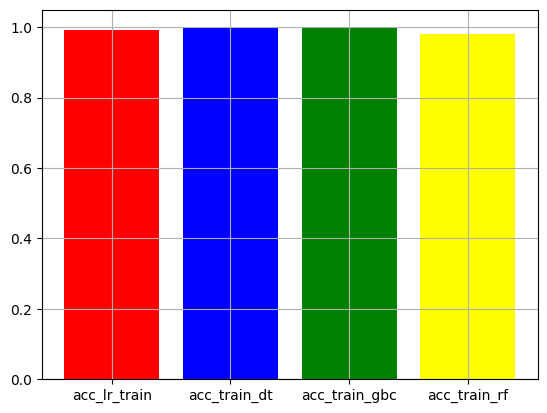

In [164]:
acc_train_model  = [acc_lr_train,acc_train_dt,acc_train_gbc,acc_train_rf]
acc_train_title = ['acc_lr_train','acc_train_dt','acc_train_gbc','acc_train_rf']
acc_train_color = ['red','blue','green','yellow']
plt.bar(acc_train_title,acc_train_model,color = acc_train_color)
plt.grid()
plt.show()

In [165]:
def output_label(n):
    if n == 0:
        return 'This is a real news. '
    elif n == 1:
        return 'This is a fake news'
def manual_testing(news):
    testing_news = {'text':[news]}
    news_def_test = pd.DataFrame(testing_news)
    news_def_test['text'] = news_def_test['text'].apply(clean_text)
    news_x_test = news_def_test['text']
    news_xv_test = vectorizer.transform(news_x_test)
    pred_Lr = LR.predict(news_xv_test)
    pred_Dt = dt.predict(news_xv_test)
    pred_Gbc = gbc.predict(news_xv_test)
    pred_Rf = rf.predict(news_xv_test)       
    return print(f"Logistic_regression :{output_label(pred_Lr[0])}\nDesissionTree classifier: {output_label(pred_Dt[0])}\nGradientBoosting Classifier: {output_label(pred_Gbc[0])}\n RandomForest Classifier: {output_label(pred_Rf[0])}")
    

In [167]:
news = str(input("Enter your news."))
manual_testing(news)

Enter your news. hellO every One this is my fake and real new detectiOn


Logistic_regression :This is a real news. 
DesissionTree classifier: This is a real news. 
GradientBoosting Classifier: This is a real news. 
 RandomForest Classifier: This is a real news. 
